
# Explore IMDb movies data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The data set  that we are dealing with is collected from The Movie Database (TMDb) and contains a lot of important information about more than 4000 movie. the data explains a lot of movies features and how it affect the success or failure of each one to observe the features that make a movie succeed and how can we determine its success. 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

In this section, we are going to load our data, explore it and clean it to make it ready for making our analysis and driving our observations from it.


### Loading and explore data :

In [12]:
df = pd.read_csv('tmdb_5000_movies.csv')

print(df.shape)
df.head()

(4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [14]:
# Knowing the data type of each column :
df.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [15]:
# Knowing if any column contains null values :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [17]:
# Let's see the difference between original_title and title :
sum(df['original_title'] == df['title'])

4542

As shown above, 4542 movie has the same 'title' and 'original_title'. So, lets reduce redundancy and remove one of them. But now let's see some of the rows when title and original_title are difference :

In [18]:
df[df['original_title'] != df['title']]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
97,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,315011,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671,...",ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.476999,"[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",2016-07-29,77000000,120.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,A god incarnate. A city doomed.,Shin Godzilla,6.5,143
215,130000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",NaN,1979,"[{""id"": 657, ""name"": ""fire""}, {""id"": 720, ""nam...",en,4: Rise of the Silver Surfer,The Fantastic Four return to the big screen as...,60.810723,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2007-06-13,289047763,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Discover the secret of the Surfer.,Fantastic 4: Rise of the Silver Surfer,5.4,2589
235,97250400,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",http://www.asterixauxjeuxolympiques.com/index.php,2395,"[{""id"": 271, ""name"": ""competition""}, {""id"": 12...",fr,Astérix aux Jeux Olympiques,Astérix and Obélix have to win the Olympic Gam...,20.344364,"[{""name"": ""Constantin Film"", ""id"": 47}, {""name...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2008-01-13,132900000,116.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,NaN,Asterix at the Olympic Games,5.0,471
317,94000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",http://www.theflowersofwarmovie.com/,76758,"[{""id"": 173251, ""name"": ""forced prostitution""}...",zh,金陵十三釵,A Westerner finds refuge with a group of women...,12.516546,"[{""name"": ""Beijing New Picture Film Co. Ltd."",...","[{""iso_3166_1"": ""CN"", ""name"": ""China""}, {""iso_...",2011-12-15,95311434,145.0,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Released,NaN,The Flowers of War,7.1,187
474,0,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...",NaN,330770,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 658, ""na...",fr,Évolution,11-year-old Nicolas lives with his mother in a...,3.300061,"[{""name"": ""Ex Nihilo"", ""id"": 3307}, {""name"": ""...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2015-09-14,0,81.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,NaN,Evolution,6.4,47
488,86000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",NaN,9992,"[{""id"": 1158, ""name"": ""grandfather grandson re...",en,Arthur et les Minimoys,Arthur is a spirited ten-year old whose parent...,27.097932,"[{""name"": ""Canal Plus"", ""id"": 104}, {""name"": ""...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}]",2006-12-13,107944236,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Adventure awaits in your own backyard.,Arthur and the Invisibles,6.0,639
492,8000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 16, ""nam...",NaN,293644,"[{""id"": 209714, ""name"": ""3d""}]",es,Don Gato: El inicio de la pandilla,Top Cat has arrived to charm his way into your...,0.719996,"[{""name"": ""Anima Estudios"", ""id"": 9965}, {""nam...","[{""iso_3166_1"": ""IN"", ""name"": ""India""}, {""iso_...",2015-10-30,0,89.0,[],Released,NaN,Top Cat Begins,5.3,9
561,74500000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",NaN,1997,"[{""id"": 380, ""name"": ""brother brother relation...",en,Deux frères,Two tigers are separated as cubs and taken int...,8.884318,"[{""name"": ""Path\u00e9 Renn Productions"", ""id"":...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso...",2004-04-07,62172050,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso..

As shown above, original_title column contains non English words that is not necessary for us. So, we are going to remove that column and keep 'title' column only.

### Data Cleaning :

#### Removing unnecessary columns :

In [21]:
# Removing 'original_title' column :

#df.drop('original_title' , axis=1 , inplace = True)
df.shape

(4803, 19)

As we can see from the dataframe info, the column 'homepage' contains only 1712 values out of 4803 and the rest is null values. This is completely not enough that we are going to remove that column too.

In [22]:
# Remove homepage column :
df.drop('homepage' , axis=1 , inplace = True)
df.shape

(4803, 18)

#### Filling null values :

In [23]:
# Replace null values in Overview column with 'Not exist'
df['overview'].fillna('Not exist' , inplace=True)

Release_date column contains only one null value. So, lets see the whole row of that null value :

In [25]:
df[df['release_date'].isnull()]

,budget,genres,id,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4553,0,[],380097,[],en,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


As shown above, most of the values are missing with 'America Is Still the place' movie (that does not have realse date value), so it is better to remove the whole row

In [26]:
# Removing the row that contains null release date value :
df = df[df['release_date'].notnull()]

In [27]:
df.shape

(4802, 18)

In [28]:
# Replace null values in runtime column with its average :
runtime_avg = df['runtime'].notna().mean()
df['runtime'].fillna(runtime_avg , inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4802
Data columns (total 18 columns):
budget                  4802 non-null int64
genres                  4802 non-null object
id                      4802 non-null int64
keywords                4802 non-null object
original_language       4802 non-null object
overview                4802 non-null object
popularity              4802 non-null float64
production_companies    4802 non-null object
production_countries    4802 non-null object
release_date            4802 non-null object
revenue                 4802 non-null int64
runtime                 4802 non-null float64
spoken_languages        4802 non-null object
status                  4802 non-null object
tagline                 3959 non-null object
title                   4802 non-null object
vote_average            4802 non-null float64
vote_count              4802 non-null int64
dtypes: float64(3), int64(4), object(11)
memory usage: 712.8+ KB


In [30]:
# Replace null values in tagline column with 'Not exist'
df['tagline'].fillna('Not exist' , inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4802
Data columns (total 18 columns):
budget                  4802 non-null int64
genres                  4802 non-null object
id                      4802 non-null int64
keywords                4802 non-null object
original_language       4802 non-null object
overview                4802 non-null object
popularity              4802 non-null float64
production_companies    4802 non-null object
production_countries    4802 non-null object
release_date            4802 non-null object
revenue                 4802 non-null int64
runtime                 4802 non-null float64
spoken_languages        4802 non-null object
status                  4802 non-null object
tagline                 4802 non-null object
title                   4802 non-null object
vote_average            4802 non-null float64
vote_count              4802 non-null int64
dtypes: float64(3), int64(4), object(11)
memory usage: 712.8+ KB


<a id='eda'></a>
## Exploratory Data Analysis

After cleaning our data, we're ready to move on to exploration. We are going to compute statistics and create visualizations so that we can analyse and answer some questions about the data.


### How does the movie budget affect its success?

Let's plot the movies budget with the dependent features that determine the success of the movie (popularity, revenue and vote_avrage) and see if there is a clear relationship between the movie budget and any of that features :

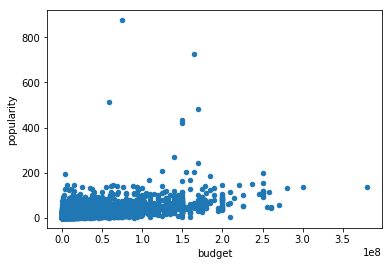

In [32]:
# scatter plot between budget and popularity :
df.plot(x='budget' , y='popularity' , kind='scatter');

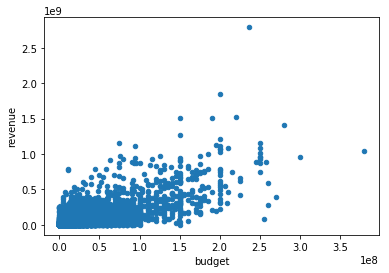

In [33]:
# scatter plot between budget and popularity :
df.plot(x='budget' , y='revenue' , kind='scatter');

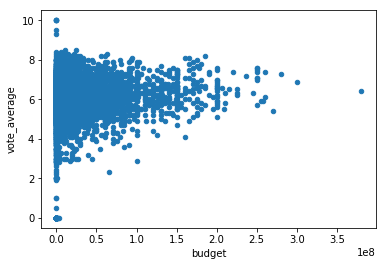

In [34]:
# scatter plot between budget and popularity :
df.plot(x='budget' , y='vote_average' , kind='scatter');

#### Observation :

As seen from the above three plots, the most feature that has a releationship with budget is the revenue. It is very clear that revenue is directly propotional to the movie budget.

While the other two plots show that there isn't a clear relationship between the movie budget and the popularity of the movie or its vote average. Some of the low budget movies got very high popularity that high budget movies did not get it. Also the vote average has a common range that is between 4 and 8 despite of how much the movie budget was.

### How do movie budget and revenue change overtime?

In [35]:
df['release_date'].describe()

count           4802
unique          3280
top       2006-01-01
freq              10
Name: release_date, dtype: object

Now, we want to see on average how much the money spent and gained from movies changed between the 20th and 21st centuries.

So, let's Order the movies by their release date and get the first movie came in the 21st century so that we can split the movies into before and after 2000 :

In [37]:
# getting the first movie came in the 21st century

df['release_date'] = pd.to_datetime(df['release_date'])
release_date_sorted = pd.DataFrame(df['release_date'].sort_values())
release_date_sorted.reset_index(inplace=True)
release_date_sorted.drop('index',axis=1,inplace=True)
release_date_sorted.iloc[1308,0]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Timestamp('2000-01-01 00:00:00')

Getting all the movies that came in the 20th century and obtaining their budget and revenue averages :

In [38]:
before_2000 = df.sort_values('release_date').iloc[0:1308,:];
before_2000.shape

(1308, 18)

In [39]:
print("average budget before 2000 : " , before_2000['budget'].mean())
print("average revenue before 2000 : " , before_2000['revenue'].mean())

average budget before 2000 :  20843081.8677
average revenue before 2000 :  67828967.5673


Getting all the movies that came in the 21th century and obtaining their budget and revenue averages :

In [40]:
after_2000 = df.sort_values('release_date').iloc[1308:,:];
after_2000.shape

(3494, 18)

In [42]:
print("average budget after 2000 : " , after_2000['budget'].mean())
print("average revenue after 2000 : " , after_2000['revenue'].mean())

average budget after 2000 :  32123805.2198
average revenue after 2000 :  87686765.2736


#### Observation :

We can see that the movies average budget and revenue in the 21st century increased by about 20 million over the movies in the 20th century and this is how the release date of the movie affects its budget and revenue.

### Does the movies industry affected by the movie Original language ?

Let's start by seeing how many original languages exist in the data set and the count of each movie category :

In [43]:
df['original_language'].value_counts()

en    4504
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
he       3
th       3
cs       2
ro       2
ar       2
ta       2
id       2
vi       1
pl       1
hu       1
tr       1
xx       1
te       1
sl       1
ps       1
ky       1
no       1
af       1
nb       1
el       1
is       1
Name: original_language, dtype: int64

Most of the movies has English language. So, when we are driving observations about the movies budget and revenue according to their original language, we should look for the average, as the sum would definitly be at its highest value with English movies (which are 4504 movie).

In [45]:
df.groupby('original_language').vote_count.mean().sort_values(ascending=False)

original_language
en    719.183393
ja    715.750000
id    632.500000
ko    588.818182
nb    583.000000
da    450.428571
it    403.928571
el    332.000000
pt    321.444444
no    311.000000
es    301.875000
pl    260.000000
de    242.444444
fr    228.828571
cn    220.916667
fa    155.250000
zh    146.592593
te    135.000000
he    112.666667
xx    109.000000
th    108.333333
ru     95.181818
af     94.000000
nl     92.750000
sv     87.000000
ro     78.000000
ar     53.500000
hi     44.000000
ps     32.000000
hu     28.000000
is     26.000000
cs     12.000000
tr      7.000000
ta      4.000000
sl      1.000000
vi      1.000000
ky      0.000000
Name: vote_count, dtype: float64

In [46]:
df.groupby('original_language').vote_average.mean().sort_values(ascending=False)

original_language
te    7.500000
id    7.400000
he    7.400000
fa    7.375000
ar    7.300000
nl    7.175000
da    7.128571
pl    7.100000
xx    7.100000
sv    7.060000
ja    7.050000
it    7.028571
af    6.900000
el    6.900000
is    6.900000
nb    6.700000
ko    6.672727
es    6.659375
hu    6.500000
cn    6.500000
fr    6.430000
pt    6.388889
ru    6.354545
de    6.325926
zh    6.300000
ps    6.300000
no    6.100000
en    6.067029
hi    6.010526
sl    6.000000
th    5.966667
ta    5.850000
cs    5.650000
vi    5.000000
tr    4.300000
ro    3.650000
ky    0.000000
Name: vote_average, dtype: float64

In [47]:
df.groupby('original_language').budget.mean().sort_values(ascending=False)

original_language
te    4.000000e+07
en    3.040111e+07
zh    2.202560e+07
ja    1.429361e+07
ko    1.429091e+07
ru    1.397273e+07
xx    1.200000e+07
cn    1.072641e+07
tr    1.000000e+07
da    9.742857e+06
de    8.616354e+06
fr    8.480997e+06
nl    7.375000e+06
es    5.847683e+06
sv    5.000000e+06
th    4.833333e+06
nb    3.500000e+06
af    3.000000e+06
it    2.967859e+06
pl    2.159280e+06
hi    1.715789e+06
vi    1.300000e+06
pt    1.133333e+06
id    1.050000e+06
no    8.000000e+05
he    6.666667e+05
ro    4.262550e+05
fa    2.450000e+05
ps    4.600000e+04
is    1.000000e+01
el    0.000000e+00
hu    0.000000e+00
ta    0.000000e+00
cs    0.000000e+00
sl    0.000000e+00
ar    0.000000e+00
ky    0.000000e+00
Name: budget, dtype: float64

In [48]:
df.groupby('original_language').revenue.mean().sort_values(ascending=False)

original_language
te    1.000000e+08
en    8.649805e+07
ja    6.602892e+07
xx    5.526056e+07
zh    4.173498e+07
cn    3.374016e+07
da    2.989889e+07
ko    2.535645e+07
es    1.865218e+07
de    1.396191e+07
fr    1.246151e+07
th    1.203408e+07
pl    1.070000e+07
af    9.879971e+06
ru    9.510074e+06
hi    7.447231e+06
nl    6.680779e+06
nb    4.159678e+06
pt    4.026498e+06
he    3.708616e+06
it    3.029494e+06
id    2.274881e+06
no    1.984662e+06
vi    6.390000e+05
ro    5.928915e+05
fa    2.250000e+05
el    1.101970e+05
is    1.100000e+01
hu    0.000000e+00
ta    0.000000e+00
sv    0.000000e+00
ky    0.000000e+00
ps    0.000000e+00
tr    0.000000e+00
cs    0.000000e+00
ar    0.000000e+00
sl    0.000000e+00
Name: revenue, dtype: float64

#### Observation :

We can observe that there are movies with some specific languages (English and Japanese for example) that have highest budget, revenue and they are the most common movies to have the highest vote_count.

Also we can see that these movies are not the ones with the highest vote average because of that high vote counts.

Number of votes extremly affected by the original language of the movie. We can see that English movies have the largest number of votes (3239202 votes for all English movies), while the summation of total votes for movies with some languages are just less than 10 votes!

<a id='conclusions'></a>
## Conclusions

Finally, we can conclude that each movie success can be determined according to some variables. These variables depend on a lot of components that we actually can use to make indecations about whether ther movie would succeed or not before it is even published.


In [50]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0